In [ ]:
!python --version

Python 3.7.13


In [ ]:
!pip uninstall wordcloud
!pip install wordcloud
!pip install fonttools

Found existing installation: wordcloud 1.5.0
Uninstalling wordcloud-1.5.0:
  Would remove:
    /usr/local/bin/wordcloud_cli
    /usr/local/lib/python3.7/dist-packages/wordcloud-1.5.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/wordcloud/*
Proceed (y/n)? y
  Successfully uninstalled wordcloud-1.5.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 366 kB 7.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 930 kB 8.4 MB/s 
ERROR: Operation cancelled by user


In [ ]:
!pip uninstall spacy
!pip install spacy

Found existing installation: spacy 2.2.4
Uninstalling spacy-2.2.4:
  Would remove:
    /usr/local/bin/spacy
    /usr/local/lib/python3.7/dist-packages/bin/*
    /usr/local/lib/python3.7/dist-packages/spacy-2.2.4.dist-info/*
    /usr/local/lib/python3.7/dist-packages/spacy/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.7/dist-packages/bin/theano_cache.py
Proceed (y/n)? y
  Successfully uninstalled spacy-2.2.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.2 MB 6.5 MB/s 
     |████████████████████████████████| 457 kB 31.5 MB/s 
     |████████████████████████████████| 42 kB 1.4 MB/s 
     |████████████████████████████████| 181 kB 7.3 MB/s 
     |████████████████████████████████| 660 kB 43.8 MB/s 
     |████████████████████████████████| 10.1 MB 36.9 MB/s 
     |████████████████████████████████| 58 kB 5.1 MB/s 
  Attempting uninstall: typing-extensions
    Found existing

In [ ]:
!python -m spacy download es_core_news_md

In [ ]:
import spacy as spc
nlp = spc.load('es_core_news_md')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

# import cairosvg
from PIL import Image
from io import BytesIO

import nltk
nltk.download('stopwords')
import re
from unicodedata import normalize
import time
from os import listdir
from nltk.corpus import stopwords
from collections import defaultdict #para que cuando una nueva palabra sea encontrada la reemplaze
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
def ls(ruta = '.'):
    return listdir(ruta)
directory= '/content/drive/MyDrive/Proyectos/student_learning_nlp/'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopwords(doc,stopwords):
  '''
  Take string and remove the stopwords from it.
  '''
  token = [token for token in doc.split(' ') if token != "" if token not in stopwords]
  return ' '.join(token)

def clean_doc(doc,stopwords):
  texto = remove_stopwords(doc.lower(),stopwords)
  texto = re.sub(r'[\W]{1,}|[0-9]{1,}',' ',texto)#quitar números y caracteres extraños, lowercase
  texto = re.sub(r'([\n]{1,}|[\s]{2,})',' ',texto) #quitar espacios dobles y saltos de linea
  texto = re.sub(r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", 
        normalize( "NFD", texto), 0, re.I) #normalizar el texto quitando tildes y demas cosas
  return texto

# DataBase

In [ ]:
archivos_pre = ls(directory+'database/Pre')
archivos_pos = ls(directory+'database/Pos')

# Spacy 

In [ ]:
text = '''Soy un texto. Normalmente soy más largo y más grande. Que no te engañe mi gtrabajo herramienta bioinformatica bioinformática'''
doc = nlp(text) # Crea un objeto de spacy tipo nlp
tokens = [t.is_stop for t in doc] # Crea una lista con las palabras del texto

In [ ]:
text ='''La bioinformática es una rama de la biología dada a conocer principalmente en la década de 1990. Esta se caracteriza principalmente por relacionarse con la microbiología, de modo  que  la  investigación  biológica  llevada  a  cabo  abarca  el  almacenamiento  de secuencias moleculares en bases de datos computacionales, y la aplicación de algoritmos computacionales  para  el análisis de secuencias  de ADN  y  proteínas. Existen también algunos  laboratorios  dedicados  a  la  secuenciación  de  genomas  completos.  Los bioinformáticos, deben asumir el reto de buscar soluciones que los lleven a descubrir la manera de analizar las grandes cantidades de datos e información que se puedan llegar a manejar. 
Múltiples ramas de la ciencia se pueden ver beneficiadas por los alcances de la bioinformática en la  actualidad, ya que los trabajadores de estas áreas tales como, la bioquímica, la física, la microbiología, entre otras, pueden obtener formas más rápidas y eficaces de realizar estudios e investigaciones  específicas, ya que pueden realizar procesos de forma más rápida con dichas ayudas informáticas. Esta labor ha crecido exponencialmente con el paso del tiempo, y ha llegado a tener más alcance, ya que es una 
herramienta tecnológica que, como las demás, brinda comodidad a los seres humanos facilitando sus tareas. 
Una de las condiciones que ha sido tenida en cuenta en el desarrollo de la bioinformática, es que las secuencias de ADN y proteínas a comparar deben tener un ancestro común, de modo que han evolucionado a partir de él a lo largo de millones de años, ya sea por diferenciaciones en eventos de especiación (ortólogos), o a partir de duplicaciones celulares (parólogos), de modo que en algunos casos llegan a  convivir algunos microorganismos o microestructuras en conjunto a sus homólogos dentro de un mismo
entorno biológico, aunque con funciones distintas. Ha sido posible evidenciar que las evoluciones propias de cada especie han provocado ciertas diferenciaciones que, también, con la necesidad de adaptarse a las condiciones del entorno llevaron a los organismos a tener millones de secuencias distintas entre sí. 
Una de las causas de la diferenciación de secuencias genéticas entre organismos, puede ser la mutación que se lleva a cabo en algunas ocasiones en las cadenas de ADN, ya sea en un nucleótido en particular, o en fragmentos más largas de estas. Estas alteraciones pueden llegar a ser heredables e intercambiables con otros individuos, y pueden llegar a modificar el funcionamiento de los organismos.  
Una de las herramientas principales para iniciar con el trabajo en bioinformática, es una computadora  con  una buena capacidad de almacenamiento, que permita un correcto funcionamiento de los programas a usar, y en adición un acceso a internet que provea las facilidades necesarias para navegar en la red y acceder a información que pueda llegar a ser útil para el análisis de datos correspondientes al tema que se está tratando. Es posible aprender sobre esta ciencia teniendo como bases libros guía que servirán como 
orientación para entender más a profundidad su campo de acción y la forma adecuada de gtrabajar en ella. '''
doc = nlp(text) # Crea un objeto de spacy tipo nlp

In [ ]:
tokens = [token.text for token in doc if token.is_stop!=True]

In [ ]:
vec=[]
for token in doc: 
  vec.append([token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop])
df_doc = pd.DataFrame(vec)

In [ ]:
df_doc

,0,1,2,3,4,5,6,7
0,La,el,DET,DET,det,Xx,True,True
1,bioinformática,bioinformática,NOUN,NOUN,nsubj,xxxx,True,False
2,es,ser,AUX,AUX,cop,xx,True,True
3,una,uno,DET,DET,det,xxx,True,True
4,rama,rama,NOUN,NOUN,ROOT,xxxx,True,False
...,...,...,...,...,...,...,...,...
574,de,de,ADP,ADP,mark,xx,True,True
575,gtrabajar,gtrabajar,VERB,VERB,acl,xxxx,True,False
576,en,en,ADP,ADP,case,xx,True,True
577,ella,él,PRON,PRON,obl,xxxx,True,True


## Remove stopwords

In [ ]:
def spacy_prprocessing(doc):
  '''
  doc: cada uno de los docuemntos
  '''
  texto = re.sub(r'[\W]{1,}|[0-9]{1,}',' ',doc.lower())#quitar números y caracteres extraños, lowercase
  texto = re.sub(r'([\n]{1,}|[\s]{2,})',' ',texto) #quitar espacios dobles y saltos de linea
  texto = re.sub(r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", 
        normalize( "NFD", texto), 0, re.I) #normalizar el texto quitando tildes y demas cosas 
  doc = nlp(texto)
  tokens = [token.text for token in doc if token.is_stop!=True] # de deja el texto quitando las stopwords
  return ' '.join(tokens)

In [ ]:
vec = list()
for archivo in archivos_pre:
  f = open(directory+'database/Pre/' + archivo,'rb')
  #print(archivo)
  texto = f.read()
  f.close()
  texto = spacy_prprocessing(texto.decode('latin-1')) 
  vec.append([int(archivo[:-4]),texto])
df_pre=pd.DataFrame(vec,columns=['id','text'])

In [ ]:
vec = list()
for archivo in archivos_pos:
  f = open(directory+'database/Pos/' + archivo,'rb')
  #print(archivo)
  texto = f.read()
  f.close()
  texto = spacy_prprocessing(texto.decode('latin-1')) 
  vec.append([int(archivo[:-4]),texto])
df_pos=pd.DataFrame(vec,columns=['id','text'])

In [ ]:
df_pre.shape,df_pos.shape # El EDA de hace con ambos y la comparacion solo con los que tienen ambos (pre,pos)

((21, 2), (19, 2))

## EDA

In [ ]:
plt.style.use('seaborn')
#plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["xtick.labelsize"] = 12 
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["font.size"] = 12 
plt.rcParams["legend.fontsize"] = 12 
plt.rcParams["axes.labelsize"] = 13 
plt.rcParams["axes.titlesize"] = 12 
plt.rcParams["figure.titlesize"] = 12 

In [ ]:
df_pre['Word Count']=df_pre['text'].apply(lambda x: len(x.split(' ')))
df_pos['Word Count']=df_pos['text'].apply(lambda x: len(x.split(' ')))
df_pre['Label']='Pre'
df_pos['Label']='Pos'
df_total = pd.concat((df_pre,df_pos),axis=0)

In [ ]:
df_total.head()

,id,text,Word Count,Label
0,19,bioinformatica rama biologia dada principalmen...,201,Pre
1,8,historia conceptos basicos bioinformatica te...,216,Pre
2,16,bioinformatica surge necesidad campos biologia...,202,Pre
3,14,libro explica introduccion microbiologia cienc...,215,Pre
4,13,ambicion necesidad humana demanda realizacion ...,107,Pre


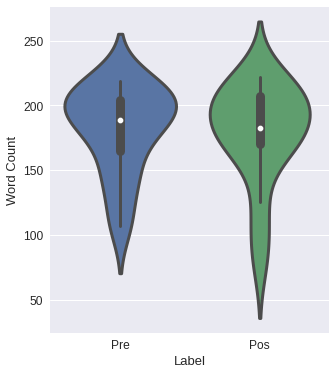

In [ ]:
plt.figure(figsize=(5,6))
sns.violinplot(data=df_total,y='Word Count',x='Label',linewidth=3) # cambiar bw para smoothing
plt.savefig('/content/drive/MyDrive/Proyectos/student_learning_nlp/images/violinplot.svg',format='svg')
plt.show()

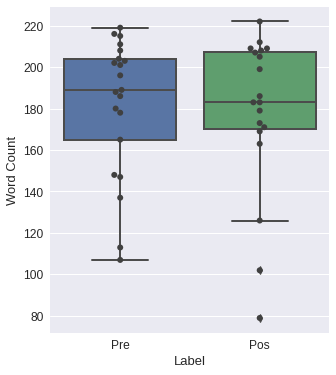

In [ ]:
plt.figure(figsize=(5,6))
ax = sns.boxplot(data=df_total,y='Word Count',x='Label',linewidth=2) 
ax = sns.swarmplot(data=df_total,y='Word Count',x='Label', color=".25",size=6)
plt.savefig('/content/drive/MyDrive/Proyectos/student_learning_nlp/images/boxplot.svg',format='svg')
plt.show()

## WordCloud

In [ ]:
from wordcloud import WordCloud
plt.style.use('default')

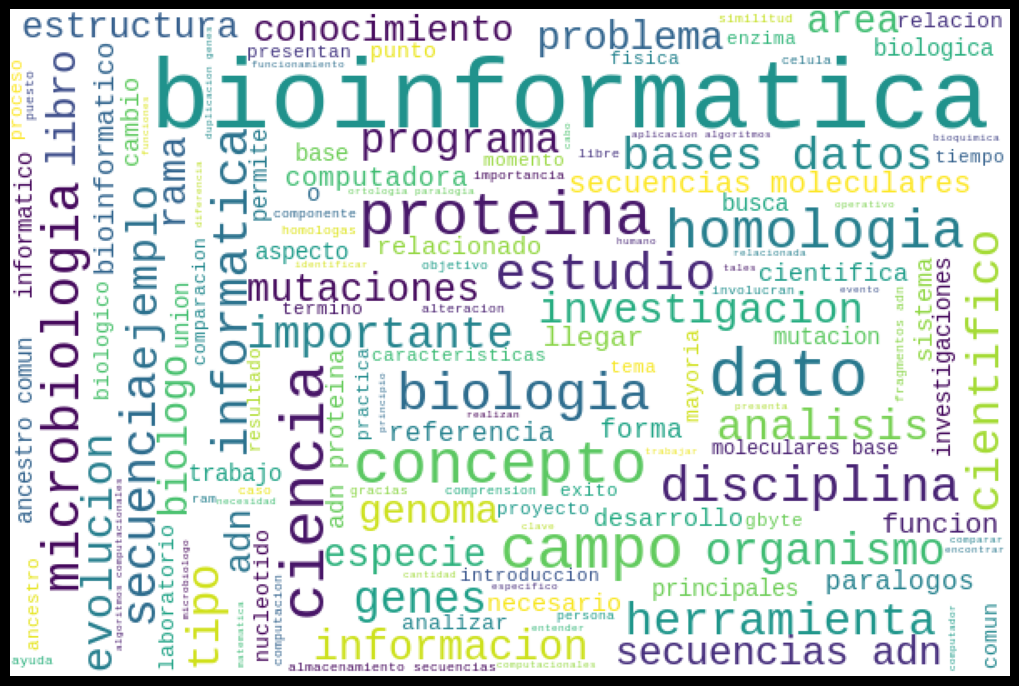

In [ ]:
docs=df_pre['text']
word_cloud=WordCloud(background_color='white',stopwords=None,width=600, height=400,min_font_size=6,max_font_size=60,prefer_horizontal=0.7).generate(' '.join(docs))
word_cloud_svg=word_cloud.to_svg(embed_font=True)
with open('/content/drive/MyDrive/Proyectos/student_learning_nlp/images/wordcloud_pre.svg', 'w') as f:
    f.write(word_cloud_svg)

img = cairosvg.svg2png(word_cloud_svg)
img = Image.open(BytesIO(img))
plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(img)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

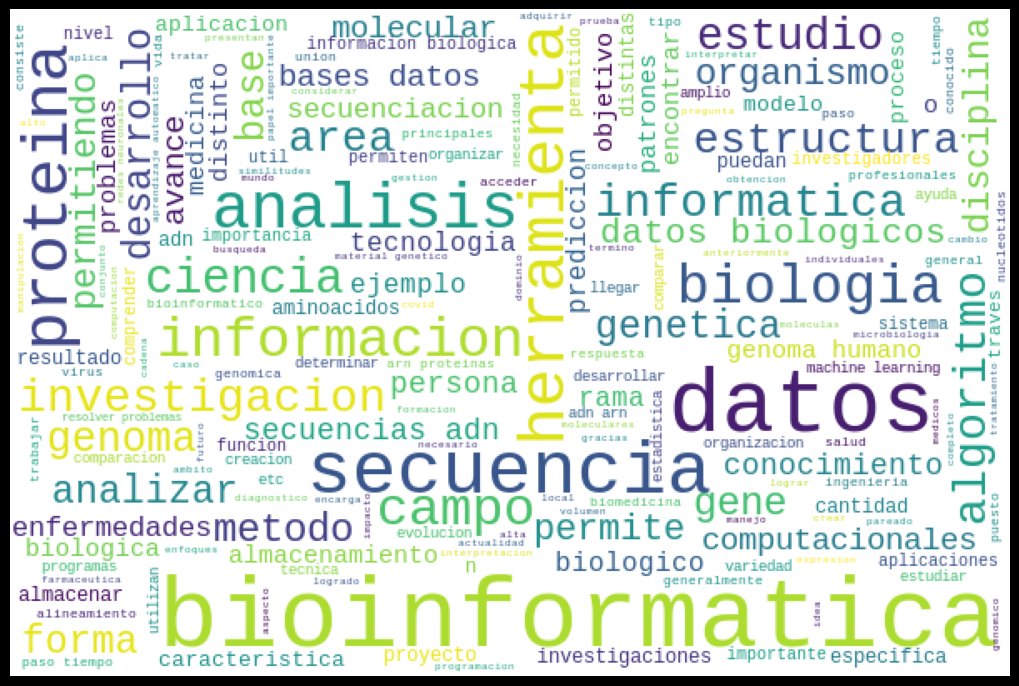

In [ ]:
docs=df_pos['text']
word_cloud=WordCloud(background_color='white',stopwords=None,width=600, height=400,min_font_size=6,max_font_size=60,prefer_horizontal=0.7).generate(' '.join(docs))
word_cloud_svg=word_cloud.to_svg(embed_font=True)
with open('/content/drive/MyDrive/Proyectos/student_learning_nlp/images/wordcloud_pos.svg', 'w') as f:
    f.write(word_cloud_svg)

img = cairosvg.svg2png(word_cloud_svg)
img = Image.open(BytesIO(img))
plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(img)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## barplot

In [ ]:
plt.style.use('seaborn')
#plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["xtick.labelsize"] = 13 
plt.rcParams["ytick.labelsize"] = 11
plt.rcParams["font.size"] = 13 
plt.rcParams["legend.fontsize"] = 13 
plt.rcParams["axes.labelsize"] = 13
plt.rcParams["axes.titlesize"] = 13 
plt.rcParams["figure.titlesize"] = 13 

In [ ]:
from collections import defaultdict
def generate_ngrams(text,n_gram=1,stop_words=None):
  stop = set(stopwords) if stop_words is not None else {}
  token = [token for token in text.split(' ') if token != "" if token not in stop]
  z=zip(*(token[i:] for i in range(n_gram)))
  ngrams=[" ".join(ngram) for ngram in z]
  return ngrams

def common_words(docs,n_gram=1,stop_words=None,w2show=(0,20)):
  vocabulary=defaultdict(int)
  for text in docs:
    for word in generate_ngrams(text,n_gram,stop_words):
      vocabulary[word]+=1
  
  df_vocabulary=pd.DataFrame(sorted(vocabulary.items(), key=lambda x: x[1], reverse=True),columns=['Term','Count'])
  #return df_vocabulary[0].values[w2show[0]:w2show[1]]
  return df_vocabulary

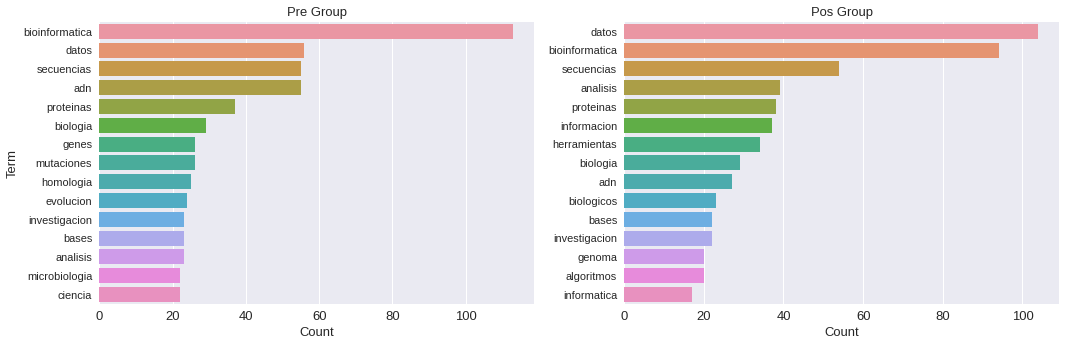

In [ ]:
n_gram=1
fig, axs = plt.subplots(1,2,figsize=(15,5),tight_layout=True)
docs=df_pre['text']
c_words=common_words(docs,n_gram=n_gram,stop_words=None,w2show=(0,20))
sns.barplot(x='Count',y='Term',data=c_words[:15],ax=axs[0])
docs=df_pos['text']
c_words=common_words(docs,n_gram=n_gram,stop_words=None,w2show=(0,20))
sns.barplot(x='Count',y='Term',data=c_words[:15],ax=axs[1])
axs[1].set_ylabel('')
axs[0].set_title('Pre Group')
axs[1].set_title('Pos Group')
plt.savefig('/content/drive/MyDrive/Proyectos/student_learning_nlp/images/count_unigram.svg',format='svg',bbox_inches='tight')
plt.show()

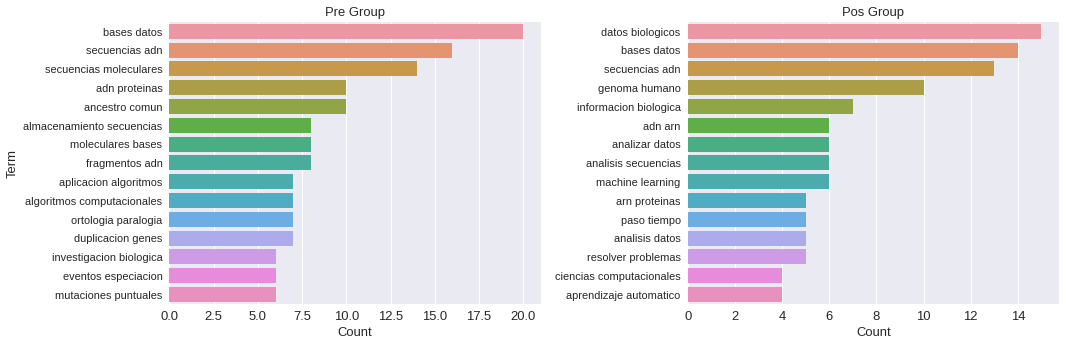

In [ ]:
n_gram=2
fig, axs = plt.subplots(1,2,figsize=(15,5),tight_layout=True)
docs=df_pre['text']
c_words=common_words(docs,n_gram=n_gram,stop_words=None,w2show=(0,20))
sns.barplot(x='Count',y='Term',data=c_words[:15],ax=axs[0])
docs=df_pos['text']
c_words=common_words(docs,n_gram=n_gram,stop_words=None,w2show=(0,20))
sns.barplot(x='Count',y='Term',data=c_words[:15],ax=axs[1])
axs[1].set_ylabel('')
axs[0].set_title('Pre Group')
axs[1].set_title('Pos Group')
plt.savefig('/content/drive/MyDrive/Proyectos/student_learning_nlp/images/count_bigram.svg',format='svg',bbox_inches='tight')
plt.show()

# DB

In [ ]:
df_total = df_pre.merge(df_pos,on='id',suffixes=('_pre','_pos'))

In [ ]:
df_total.head()

,id,text_pre,text_pos
0,19,bioinformatica rama biologia dada principalmen...,bioinformatica especialidad encargada implemen...
1,8,historia conceptos basicos bioinformatica te...,facil encontrar respuesta precisa completa pre...
2,16,bioinformatica surge necesidad campos biologia...,bioinformatica area interdisciplinaria une inf...
3,13,ambicion necesidad humana demanda realizacion ...,amplio campo ingenieria biomedica investigativ...
4,6,inicios bioinformatica relacionados microbiolo...,bioinformatica brinda posibilidad analizar dat...


In [ ]:
df_total.to_csv(directory+'database/total.csv')

In [ ]:
df_new = pd.read_csv(directory+'database/total.csv',index_col=0)
df_new

,id,text_pre,text_pos
0,19,bioinformatica rama biologia dada principalmen...,bioinformatica especialidad encargada implemen...
1,8,historia conceptos basicos bioinformatica te...,facil encontrar respuesta precisa completa pre...
2,16,bioinformatica surge necesidad campos biologia...,bioinformatica area interdisciplinaria une inf...
3,13,ambicion necesidad humana demanda realizacion ...,amplio campo ingenieria biomedica investigativ...
4,6,inicios bioinformatica relacionados microbiolo...,bioinformatica brinda posibilidad analizar dat...
5,5,lectura capitulo busca abarcar introduccion ca...,bioinformatica subdisciplina biologia ciencias...
6,11,conocimiento escritos hechos bioinformatica da...,bioinformatica disciplina estudio enfoca desar...
7,20,actualidad presentas diversos problemas relaci...,actualmente investigacion aplicacion herramien...
8,7,definir bioinformatica sencilla combinacion co...,bioinformatica rama biologia informatica varie...
9,10,traves años bioinformatica convertido discipl...,bioinformatica referencia ciencia multidiscipl...
